## About Dataset
This dataset is designed for predicting food delivery times based on various influencing factors such as distance, weather, traffic conditions, and time of day. It offers a practical and engaging challenge for machine learning practitioners, especially those interested in logistics and operations research.
### Key Features:

- Order_ID: Unique identifier for each order.
- Distance_km: The delivery distance in kilometers.
- Weather: Weather conditions during the delivery, including Clear, Rainy, Snowy, Foggy, and Windy.
- Traffic_Level: Traffic conditions categorized as Low, Medium, or High.
- Time_of_Day: The time when the delivery took place, categorized as Morning, Afternoon, Evening, or Night.
- Vehicle_Type: Type of vehicle used for delivery, including Bike, Scooter, and Car.
- Preparation_Time_min: The time required to prepare the order, measured in minutes.
- Courier_Experience_yrs: Experience of the courier in years.
- Delivery_Time_min: The total delivery time in minutes (target variable).

In [1]:
## Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv("data/Food_Delivery_Times.csv")
data.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [3]:
# Information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [4]:
# Data statistics
data.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [5]:
# Null Values
data.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

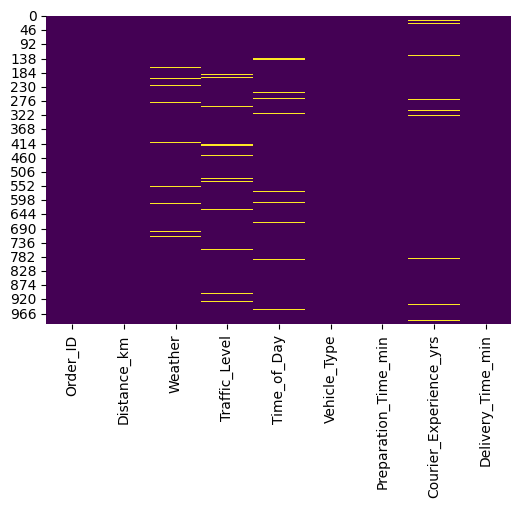

In [6]:
# Null values Visualization
plt.figure(figsize=(6,4))
sns.heatmap(data.isnull(),cmap='viridis',cbar=False)
plt.show()

In [7]:
# Filling missing values and drop ID colunm
data['Courier_Experience_yrs'] = data['Courier_Experience_yrs'].fillna(data['Courier_Experience_yrs'].median())
data['Traffic_Level'] = data['Traffic_Level'].fillna(data['Traffic_Level'].mode()[0])
data['Weather'] = data['Weather'].fillna(data["Weather"].mode()[0])
data['Time_of_Day'] = data['Time_of_Day'].fillna(data['Time_of_Day'].mode()[0])
data.drop('Order_ID',axis=1,inplace=True)
data.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68


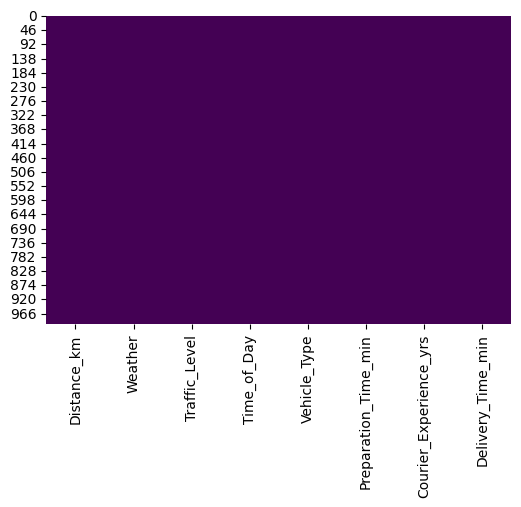

In [8]:
# Remaining null values
plt.figure(figsize=(6,4))
sns.heatmap(data.isnull(),cmap='viridis',cbar=False)
plt.show()

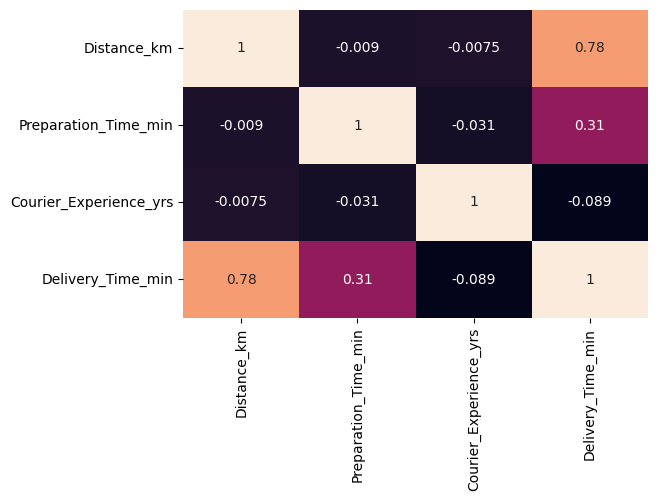

In [9]:
# Numerical feature correlation
corr = data.corr(numeric_only=True)
plt.figure(figsize=(6,4))
sns.heatmap(corr,cbar=False,annot=True)
plt.show()

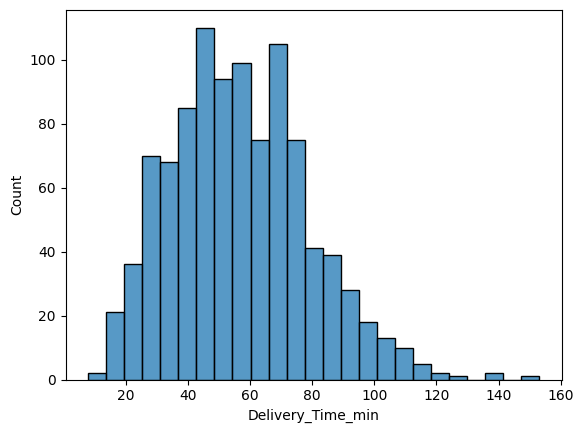

In [10]:
# Data distribution of Target feature
sns.histplot(data=data,x='Delivery_Time_min')
plt.show()

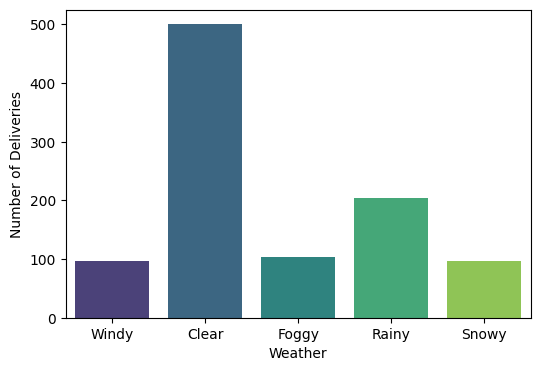

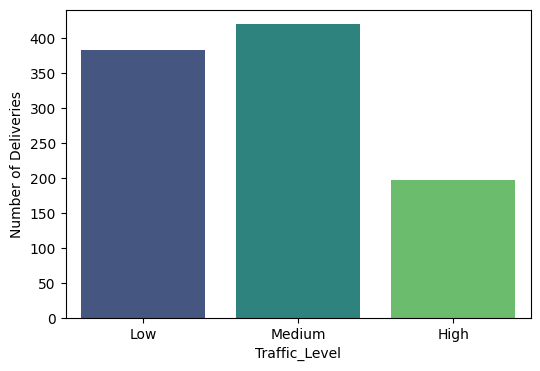

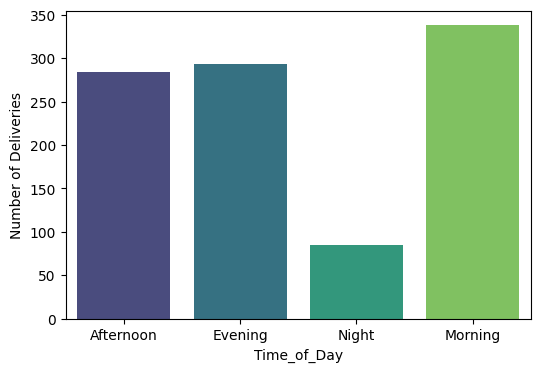

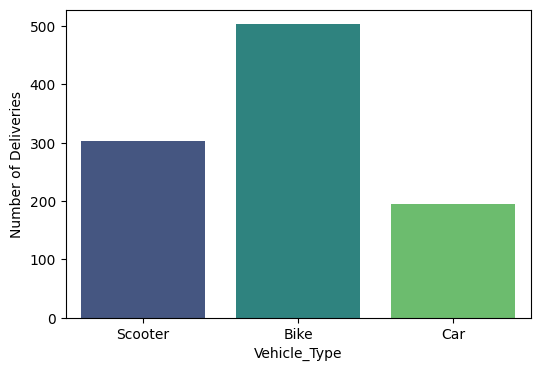

In [11]:
# Cout plots for categorical features
categorical_feat = [col for col in data.columns if data[col].dtype == "O"]

for feat in categorical_feat:
    plt.figure(figsize=(6,4))
    sns.countplot(data=data,x=feat,hue=feat,palette='viridis')
    plt.xlabel(feat)
    plt.ylabel("Number of Deliveries")
    plt.show()

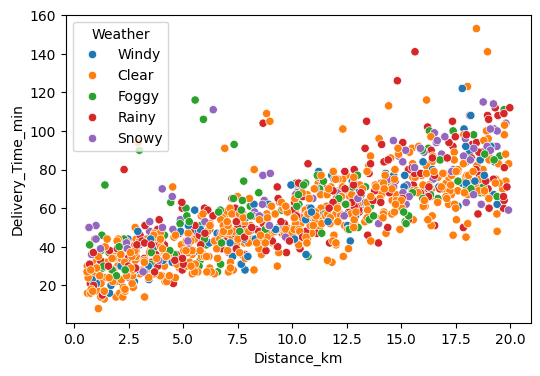

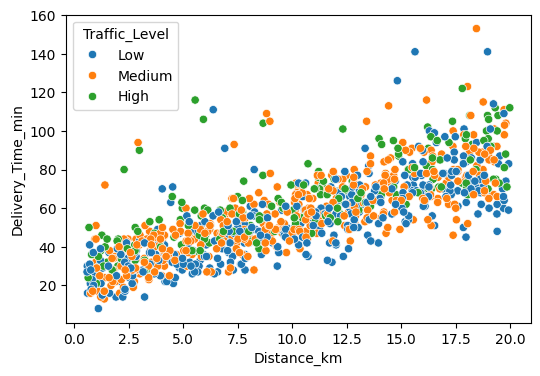

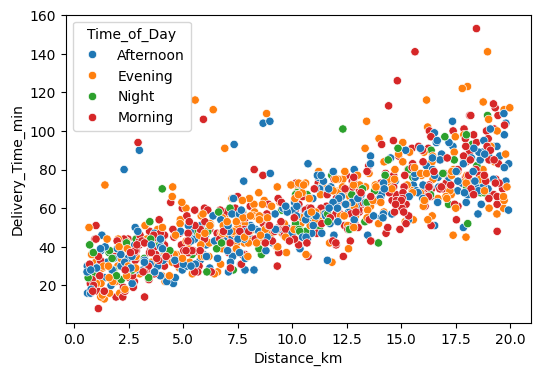

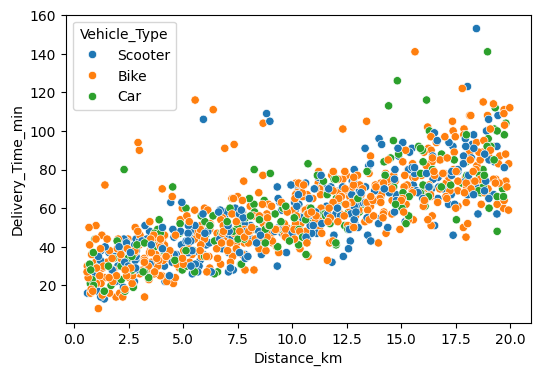

In [12]:
# Relation between Distance and Delivery time w.r.t Different categorical_feat
for feat in categorical_feat:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=data,x='Distance_km',y='Delivery_Time_min',hue=feat)
    plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X = data.drop('Delivery_Time_min',axis=1)
y = data['Delivery_Time_min']

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['Weather']=le.fit_transform(X['Weather'])
X['Traffic_Level']=le.fit_transform(X['Traffic_Level'])
X['Time_of_Day']=le.fit_transform(X['Time_of_Day'])
X['Vehicle_Type']=le.fit_transform(X['Vehicle_Type'])

In [15]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape, X_test.shape

((700, 7), (300, 7))

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [18]:
# Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [19]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Xgboost Regressor":XGBRegressor()
         }

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 11.9015
- Mean Absolute Error: 7.7691
- R2 Score: 0.7046
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10.4876
- Mean Absolute Error: 7.1003
- R2 Score: 0.7803


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 17.6447
- Mean Absolute Error: 11.8433
- R2 Score: 0.3782


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 4.7518
- Mean Absolute Error: 3.1598
- R2 Score: 0.9529
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10.0351
- Mean Absolute Error: 6.8606
- R2 Score: 0.7989


Xgboost Regressor
Model performance for Training set
- Root Mean Squared Error: 0.6388
- Mean Absolute Error: 0.4402
- R2 Score: 0.9

In [20]:
#Initialize few parameter for Hyperparamter tuning

rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

In [21]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestRegressor(), rf_params),
                   ("XGboost",XGBRegressor(),xgboost_params)
                   
                   ]

In [22]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 20, 'max_features': 5, 'max_depth': None}
---------------- Best Params for XGboost -------------------
{'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 1}


In [24]:
## Retraining the models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=500, 
                                                     min_samples_split=20, 
                                                     max_features=5, 
                                                     max_depth=None, 
                                                     n_jobs=-1),
     "Xgboost Regressor":XGBRegressor(n_estimators= 300,
                                      learning_rate=0.01,
                                      max_depth=5,
                                      colsample_bytree=1)   
        }

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 9.6391
- Mean Absolute Error: 6.3845
- R2 Score: 0.8062
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10.0692
- Mean Absolute Error: 7.0245
- R2 Score: 0.7975


Xgboost Regressor
Model performance for Training set
- Root Mean Squared Error: 8.3073
- Mean Absolute Error: 5.5539
- R2 Score: 0.8561
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.7711
- Mean Absolute Error: 7.0358
- R2 Score: 0.8093


